In [1]:
import os
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True,
                       min_detection_confidence = 0.9)

[INFO] Found 5996 image(s) in 'A'


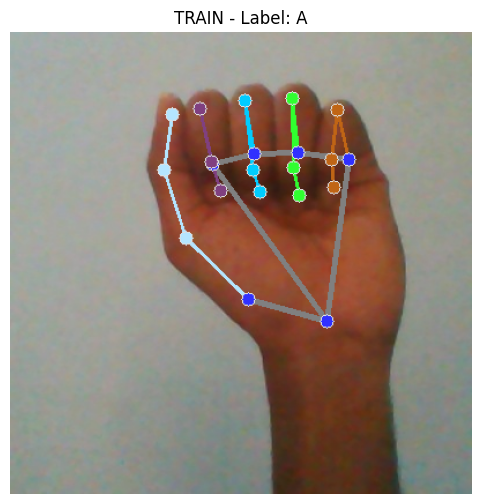

[INFO] Found 5996 image(s) in 'B'


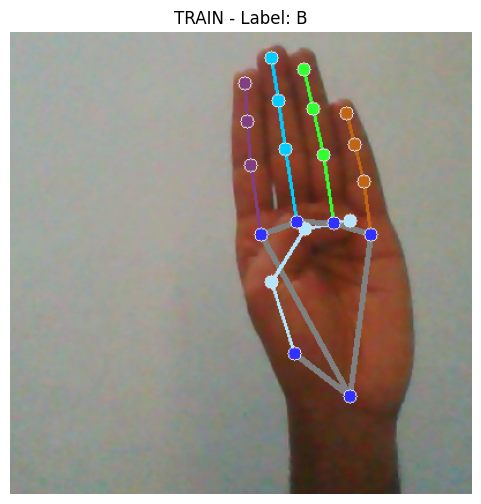

[INFO] Found 5996 image(s) in 'C'


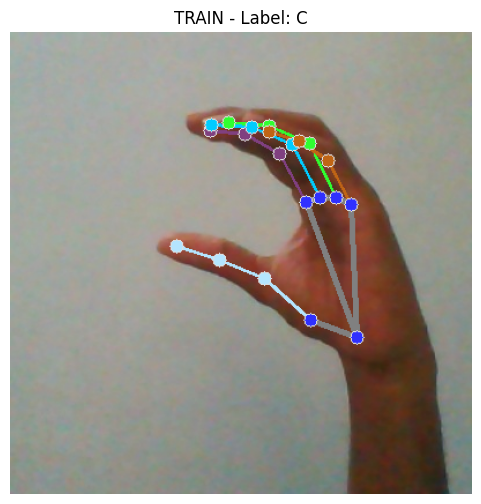

[INFO] Found 5996 image(s) in 'D'


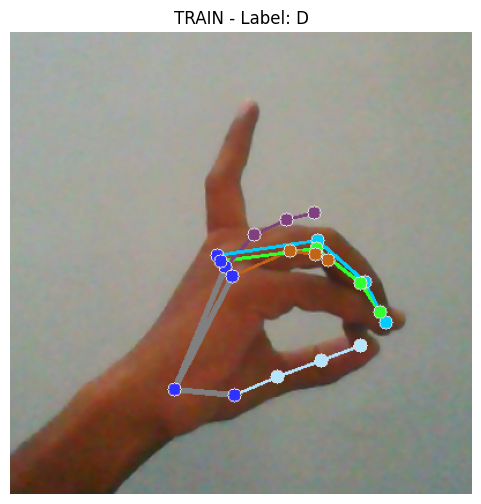

[INFO] Found 5996 image(s) in 'E'


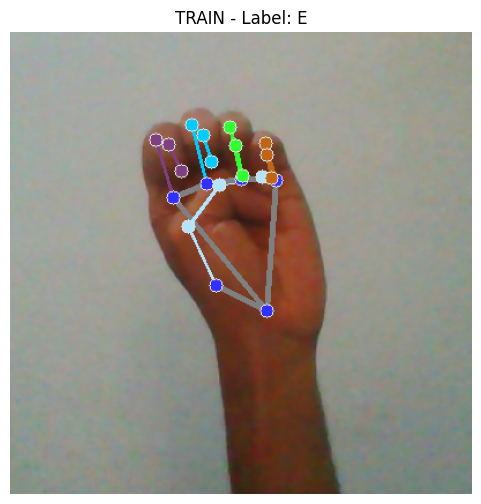

[INFO] Found 5996 image(s) in 'F'


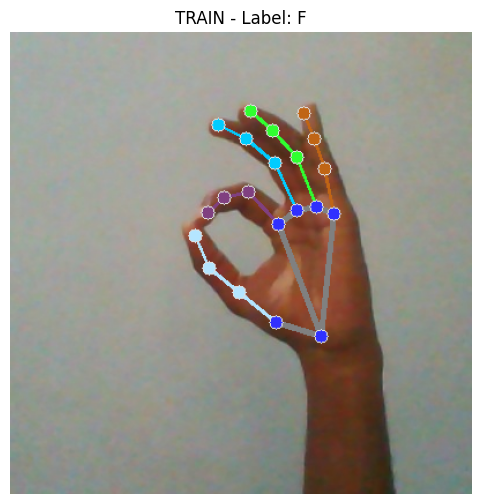

[INFO] Found 5996 image(s) in 'G'


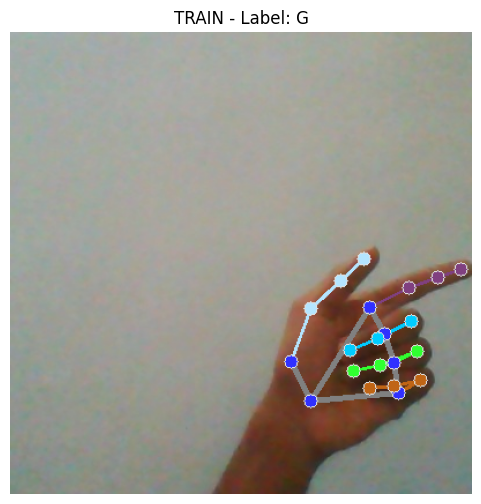

[INFO] Found 5996 image(s) in 'H'


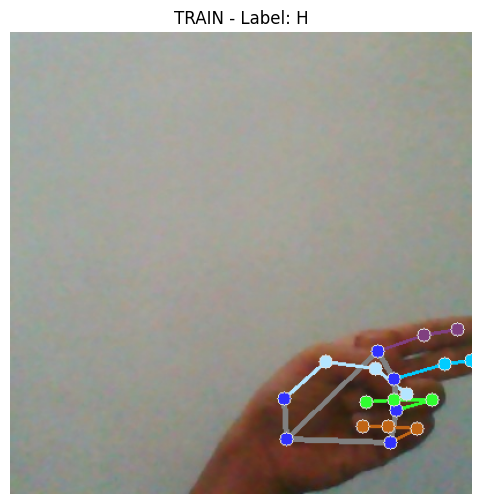

[INFO] Found 5996 image(s) in 'I'


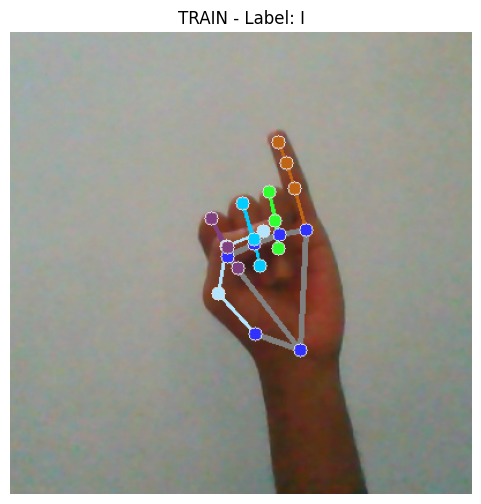

[INFO] Found 5996 image(s) in 'J'


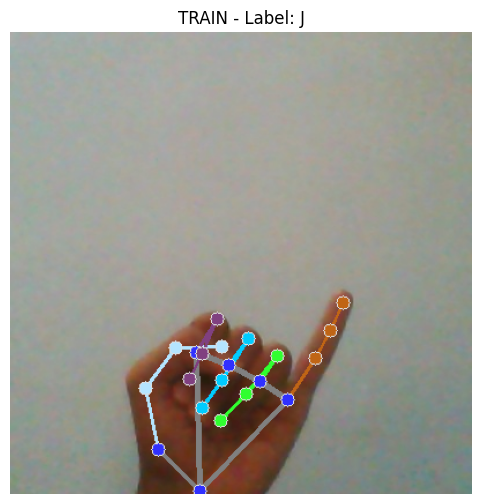

[INFO] Found 5996 image(s) in 'K'


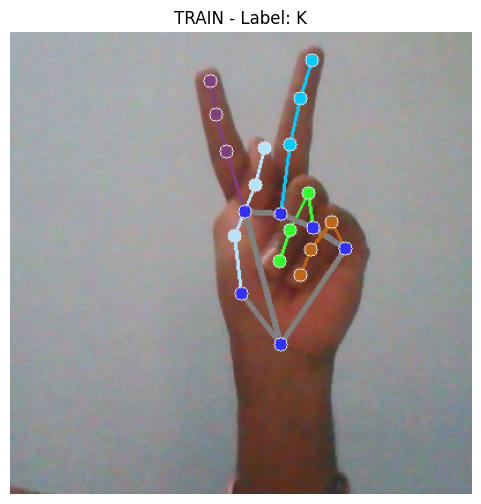

[INFO] Found 5996 image(s) in 'L'


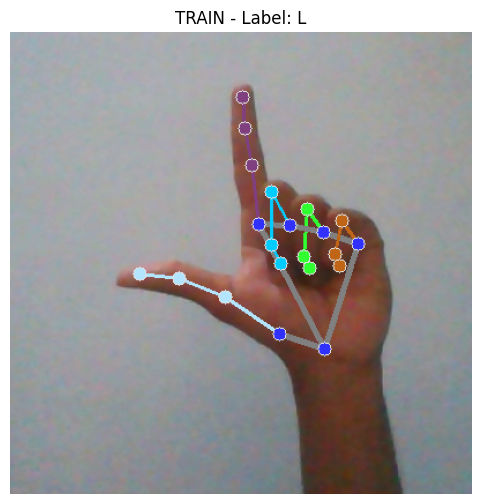

[INFO] Found 5996 image(s) in 'M'


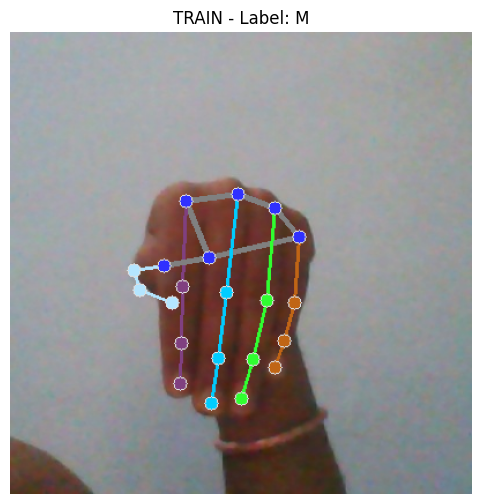

[INFO] Found 5996 image(s) in 'N'


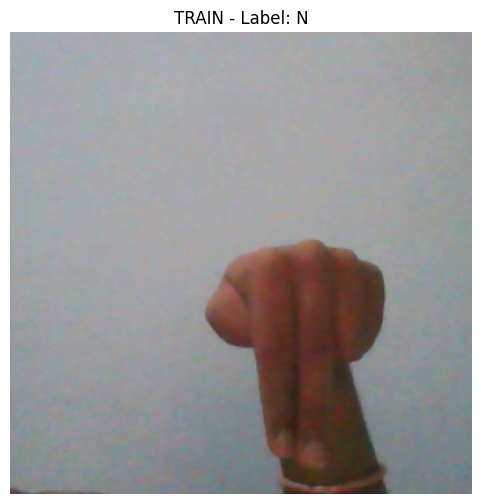

[INFO] Found 5996 image(s) in 'Nothing'


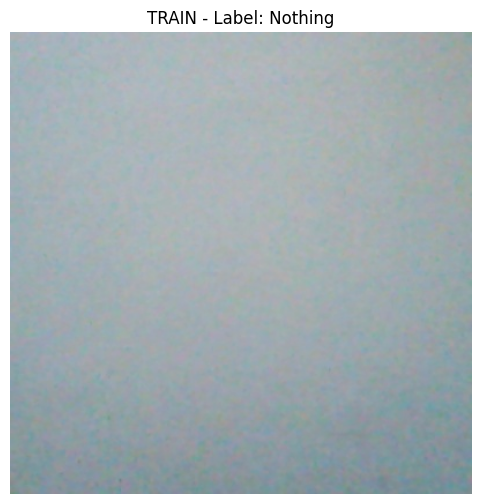

[INFO] Found 5996 image(s) in 'O'


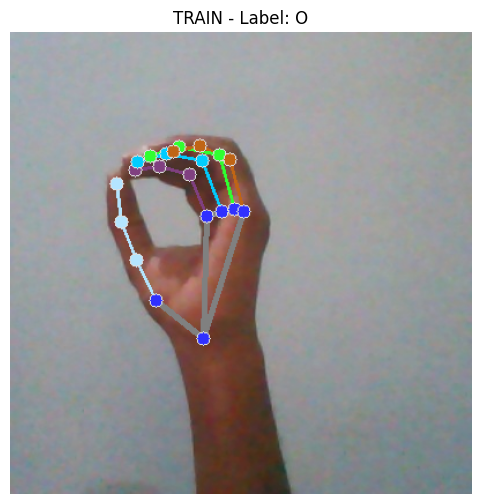

[INFO] Found 5996 image(s) in 'P'


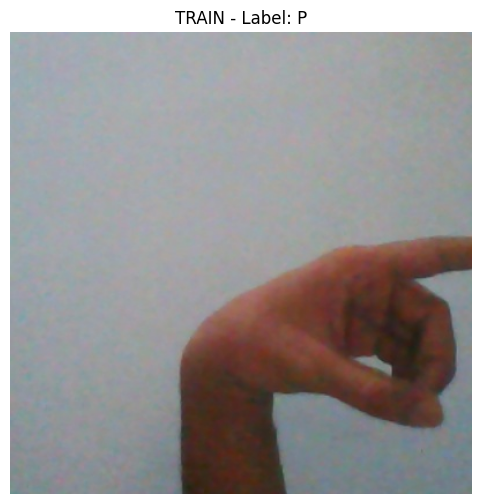

[INFO] Found 5996 image(s) in 'Q'


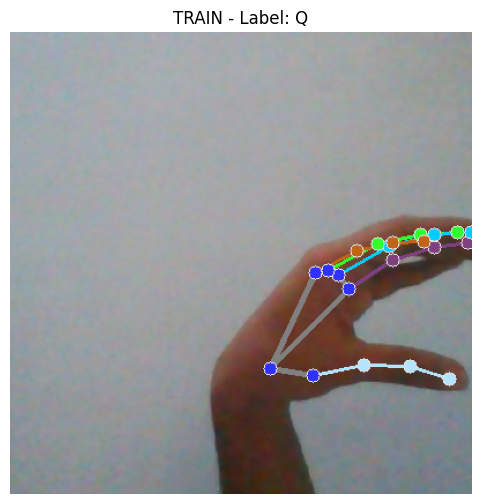

[INFO] Found 5966 image(s) in 'R'


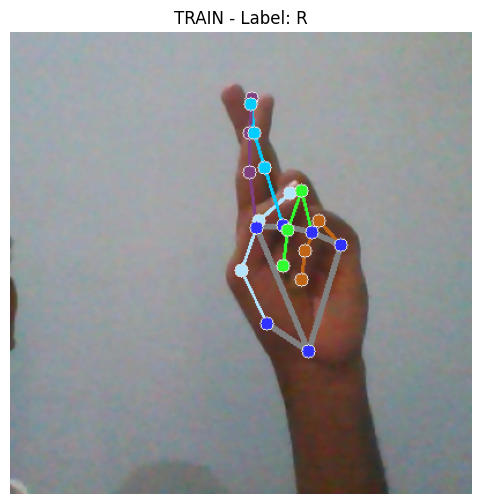

[INFO] Found 5996 image(s) in 'S'


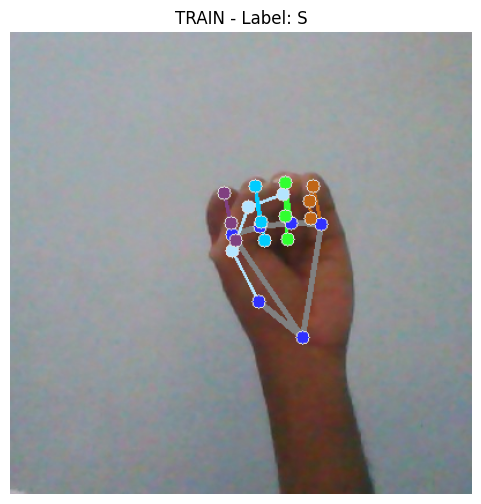

[INFO] Found 5886 image(s) in 'Space'


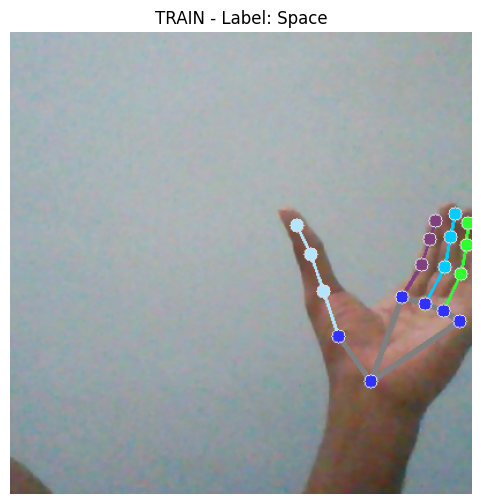

[INFO] Found 5648 image(s) in 'T'


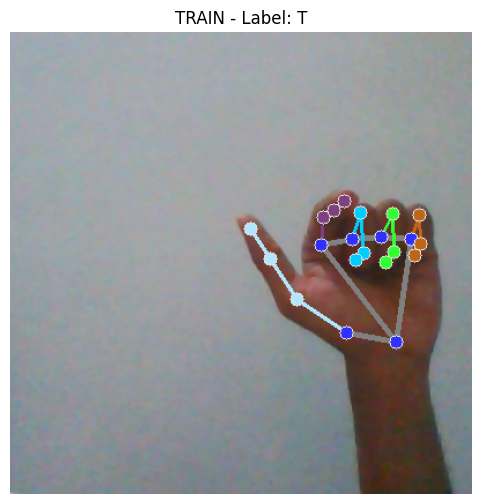

[INFO] Found 4542 image(s) in 'U'


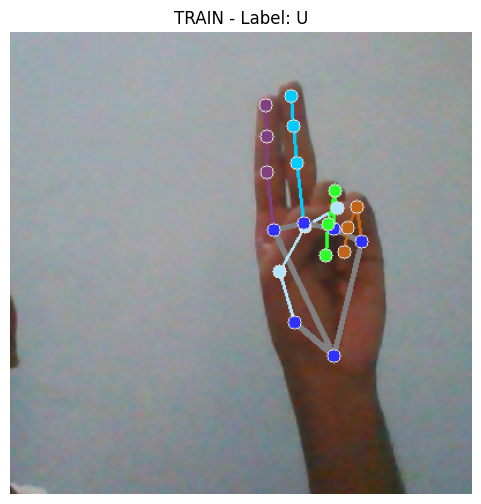

[INFO] Found 5996 image(s) in 'V'


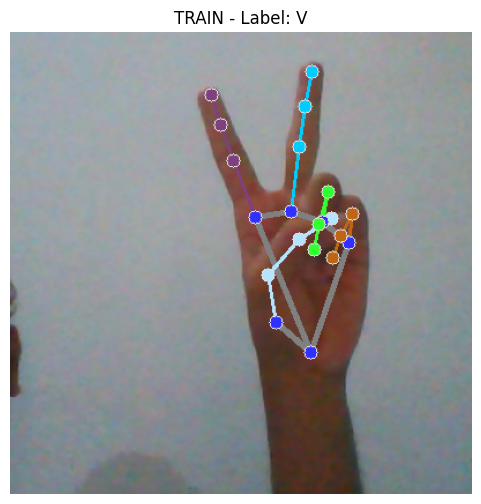

[INFO] Found 5996 image(s) in 'W'


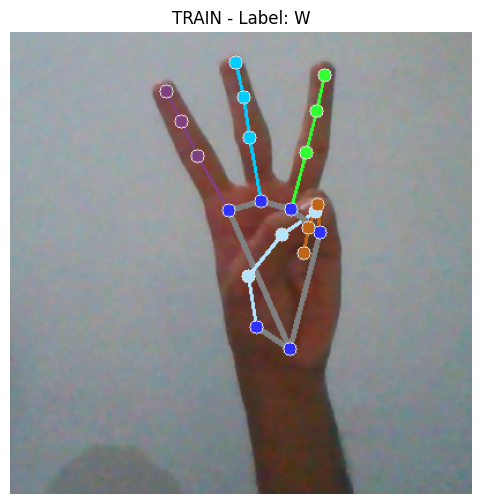

[INFO] Found 5996 image(s) in 'X'


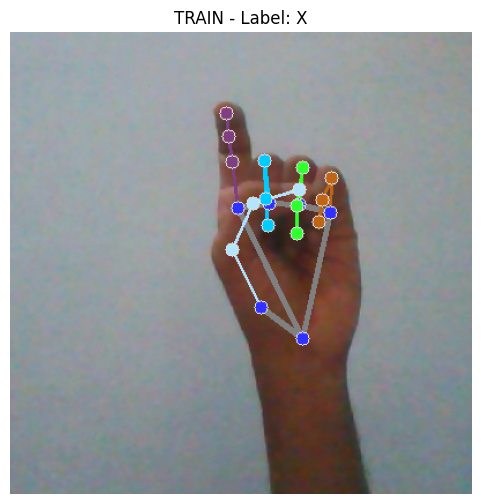

[INFO] Found 5720 image(s) in 'Y'


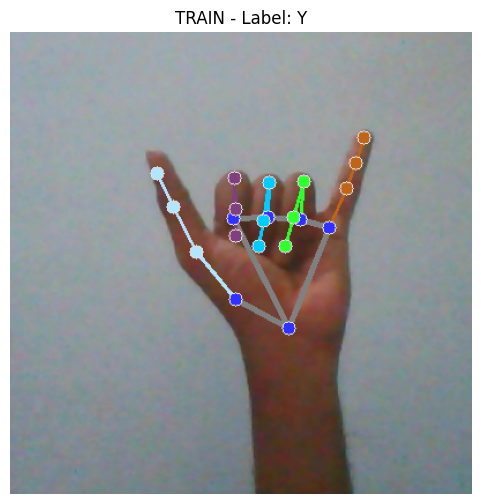

[INFO] Found 5996 image(s) in 'Z'


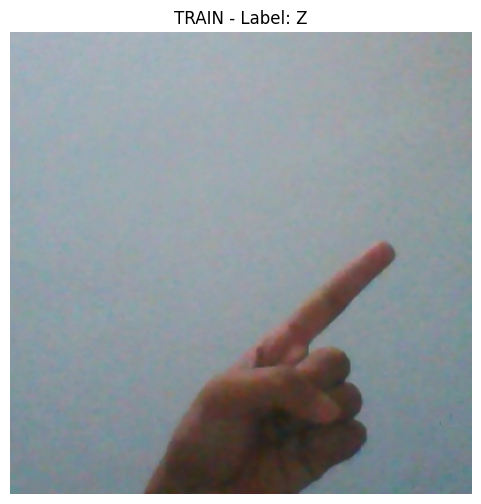

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

# Init MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True)

# 📂 Path to your 'train' or 'test' folder
split = "Train"  # or "test"
data_dir = rf"C:\Users\verma\OneDrive\Desktop\Deep-Learning\assp\Data\{split}"
valid_exts = [".jpg", ".jpeg", ".png"]

# 🔍 Loop through each class folder
for label in sorted(os.listdir(data_dir)):
    label_path = os.path.join(data_dir, label)

    if not os.path.isdir(label_path):
        continue

    # Only get image files
    image_files = [
        f for f in os.listdir(label_path)
        if os.path.isfile(os.path.join(label_path, f)) and os.path.splitext(f)[1].lower() in valid_exts
    ]

    print(f"[INFO] Found {len(image_files)} image(s) in '{label}'")

    if not image_files:
        continue

    # Load and visualize the first image in this label folder
    img_path = os.path.join(label_path, image_files[0])
    img = cv2.imread(img_path)

    if img is None:
        print(f"[WARNING] Could not read image: {img_path}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(img_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                img_rgb,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )

    plt.figure(figsize=(6, 6))
    plt.title(f"{split.upper()} - Label: {label}")
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

In [4]:
import os
import cv2
import pickle
import mediapipe as mp

# Init MediaPipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True)

# Set to 'train' or 'test'
split = "Train"
data_dir = rf"C:\Users\verma\OneDrive\Desktop\Deep-Learning\assp\Data\{split}"
valid_exts = [".jpg", ".jpeg", ".png"]

data = []
labels = []

# Loop through each label (A, B, C...)
for label in sorted(os.listdir(data_dir)):
    label_path = os.path.join(data_dir, label)
    if not os.path.isdir(label_path):
        continue

    image_files = [
        f for f in os.listdir(label_path)
        if os.path.isfile(os.path.join(label_path, f)) and os.path.splitext(f)[1].lower() in valid_exts
    ]

    print(f"[INFO] Processing {len(image_files)} images in '{label}'")

    for image_name in image_files:
        img_path = os.path.join(label_path, image_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"[WARNING] Failed to load image: {img_path}")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)

        # Extract landmarks
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                dat_aux = []
                for lm in hand_landmarks.landmark:
                    dat_aux.append(lm.x)
                    dat_aux.append(lm.y)

                data.append(dat_aux)
                labels.append(label)

print(f"[✅] Done! Total samples collected: {len(data)}")

# Save data
with open("data.pkl", "wb") as f:
    pickle.dump((data, labels), f)

print("[💾] Saved landmark data and labels to 'data.pkl'")

[INFO] Processing 5996 images in 'A'
[INFO] Processing 5996 images in 'B'
[INFO] Processing 5996 images in 'C'
[INFO] Processing 5996 images in 'D'
[INFO] Processing 5996 images in 'E'
[INFO] Processing 5996 images in 'F'
[INFO] Processing 5996 images in 'G'
[INFO] Processing 5996 images in 'H'
[INFO] Processing 5996 images in 'I'
[INFO] Processing 5996 images in 'J'
[INFO] Processing 5996 images in 'K'
[INFO] Processing 5996 images in 'L'
[INFO] Processing 5996 images in 'M'
[INFO] Processing 5996 images in 'N'
[INFO] Processing 5996 images in 'Nothing'
[INFO] Processing 5996 images in 'O'
[INFO] Processing 5996 images in 'P'
[INFO] Processing 5996 images in 'Q'
[INFO] Processing 5966 images in 'R'
[INFO] Processing 5996 images in 'S'
[INFO] Processing 5886 images in 'Space'
[INFO] Processing 5648 images in 'T'
[INFO] Processing 4542 images in 'U'
[INFO] Processing 5996 images in 'V'
[INFO] Processing 5996 images in 'W'
[INFO] Processing 5996 images in 'X'
[INFO] Processing 5720 image

In [5]:
##training 
##split data 
x_train,x_test,y_train,y_test = train_test_split(
    np.array(data),labels,
    test_size=0.2,random_state=22,
    shuffle=True
)
##train 
model = RandomForestClassifier(random_state=22)
model.fit(x_train,y_train)
##predict 
pred = model.predict(x_test)
##accuracy
score = accuracy_score(y_test,pred)
print(score)

0.9995049014753936


In [21]:
## save the model 
import pickle
f = open("data.pkl","wb")
pickle.dump(model,f)
f.close()

In [29]:
model_dict = pickle.load(open("data.pkl","rb"))
# model = model_dict['data']

In [36]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8,
                    min_tracking_confidence=0.8) as hands:
    while cap.isOpened():
        data_aux = []
        X_ = []
        y_ = []

        ret,frame = cap.read()
        H,W , _ =  frame.shape

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_rgb = cv2.flip(frame_rgb,1)
        frame_rgb.flags.writeable = False
        results = hands.process(frame_rgb)
        frame_rgb.flags.writeable = True
        frame_rgb = cv2.cvtColor(frame_rgb,cv2.COLOR_BGR2RGB)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    frame_rgb,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(28,255,2),thickness=5,
                                           circle_radius = 10),
                )
#
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    X=hand_landmarks.landmark[i].x
                    y=hand_landmarks.landmark[i].y
                    data_aux.append(X)
                    data_aux.append(y)
                    X_.append(X)
                    y_.append(y)

            x1 = int(min(X_)* W)-10
            y1 = int(min(y_)* H)-10

            x2 = int(max(X_)* W)-10
            y2 = int(max(y_)* H)-10

            prediction = model.predict([np.array(data_aux)[0:42]])[0]
            cv2.rectangle(frame_rgb,(x1,y1-10),(x2,y2),(255,99,173),6)
            cv2.putText(frame_rgb, prediction, (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 5, (255,0,0), 5, cv2.LINE_AA)

            cv2.imshow("frame",frame_rgb)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()



: 